### Title
**Evaluation of the benchmarking approach used in "Dissecting cell identity via network inference and in silico gene perturbation**

**Authors**: Jalil Nourisa, Antoine Passemiers

## Introduction
The authors of "Dissecting cell identity via network inference and in silico gene perturbation", published in Nature magazine in 2023, propose a novel method called CellOracle (CO) which employs multi-modal data of mRNA-seq and ATAC-seq data to infer the gene regulatory network (GRN). In order to showcase the performance CO compared to the other state-of-the-art GRN methods, they used 13 differnt mRNA-seq samples of mouse, from 5 different tissues. To benchmark the performance of the inferred GRN, they used Chip-seq data as ground truth (GT). They showed that CO ourperforms the rest of the GRN methods using two metrics of The area under the receiver operating characteristic (AUROC) and early precision ratio (EPR). However, our evaluation of their benchmarking process reveals certain pitfalls in their algorithm which considerably undermines the benchmarking results given in Extended Data Fig. 2-A and B of the original paper. 
## Method
We obtained the complete package of the data and the Python code used in the paper from the authors. The data contains the inferred GRN for 13 different samples, the Chip-seq data for 5 different tissues, and the benchmarking code that calculates AUCROC and EPR. For reproducibility, we include these data along side the benchmarking code on GitHub repository.  

Within the GT and the inferred network, links are represented as pairs of Transcription Factor (TF) to target. The naming conventions we'll use throughout this explanation are similar to the Python code terminology the authors used:
•	GT_tf: TFs identified in the Chip-seq data of each sample.
•	GT_target: Targets found in the Chip-seq data for each sample.
•	GT_all_genes: Both TFs and targets present in the Chip-seq data of each sample.
•	ALL_TFS: TFs across all Chip data, spanning all tissues.
•	Genes_nonzero: Genes from the mRNA-seq data that also appear in GT_all_genes.
•	Links: The refined inferred regulatory network post-ATAC-seq data filtering.
The benchmarking process by CO is as follows:
1.	Network Mapping: Create a dataframe named "all_combinations", capturing every possible regulatory scenario in the network. This is achieved by permuting the "Genes_nonzero".
2.	Filtering based on Chip Data: Exclude links from "all_combinations" if they are found in ALL_TFS but absent in GT_tf.
3.	Ground Truth Annotation: In the updated "all_combinations", label links that are in the ground truth as '1', and '0' otherwise. This labeling encompasses both false and true links, termed here as "y_true".
4.	Inference Annotation: In "all_combinations", assign inference values if the link is within the "Links", and '0' if not. This dataset is termed "y_score".
5.	Random Score Creation: Generate a "y_score_random" by shuffling the values from the previous step.
6.	AUC-ROC Calculation: Utilize sklearn's standard method to determine the AUC-ROC, considering both "y_true" and "y_score". The AUC-ROC for "y_score_random" is also calculated.
7.	EPR Calculation: Determine EPR by dividing EP by EP_random. EP is the count of GT links in the top K scores of "y_score", while EP_random is determined using "y_score_random".
However, a key observation is that the filtering approach in step 2 seems to disproportionately increase the number of false links. The current filtering method only removes a link if it is present in ALL_TFS but not in GT_tf. It does not consider combinations where a TF is not in ALL_TFS. Given that "all_combinations" is derived from permutations on "Genes_nonzero", which incorporates “GT_all_genes”, many links might have their TFs among “GT_target” but not “GT_tf”. Consequently, with the filtering method used, links with TFs from “GT_target” are counted in the evaluation. Since these links are not in the GT, they are erroneously labeled as false in step 3.

________________________________________
This version seeks to make the information more digestible by using clear headings, bullet points, and straightforward explanations.


### Overview
- Calculate benchmarking scores using Kenji's implementation: benchmarking_method = 'CO'
- Calculate benchmarking scores using our approach: benchmarking_method = 'M1'
- Investigation of the class misbalance stats by looking at the proportion of positives to negatives

Note: we are just using the GRN links received from Kenji and not obtaining them ourselves

Different samples: 100%|██████████| 13/13 [00:00<00:00, 44.63it/s]


output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_CO/grn_score_summary_22.parquet


Run for metrics: 100%|██████████| 4/4 [00:00<00:00, 500.92it/s]


output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_CO/scores_all_auc.csv
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_CO/scores_all_epr.csv
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_CO/scores_all_auc_pr.csv
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_CO/scores_all_ep.csv
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/figures/score_comparison_auc.png
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/figures/score_comparison_epr.png
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/figures/score_comparison_auc_pr.png
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/figures/score_comparison_ep.png


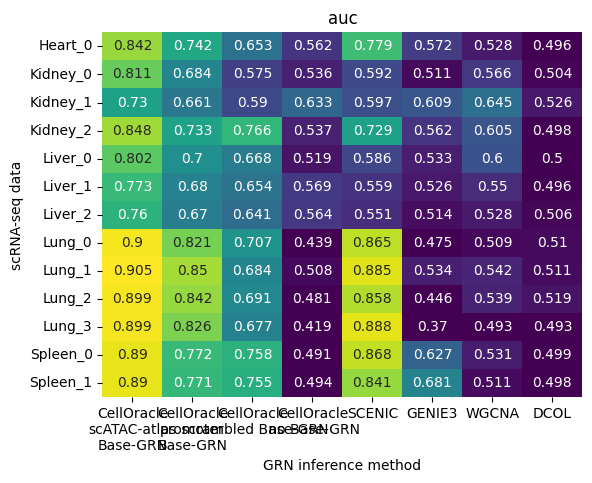

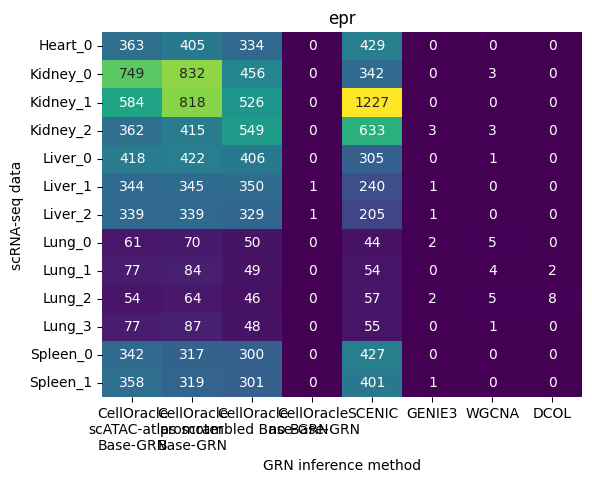

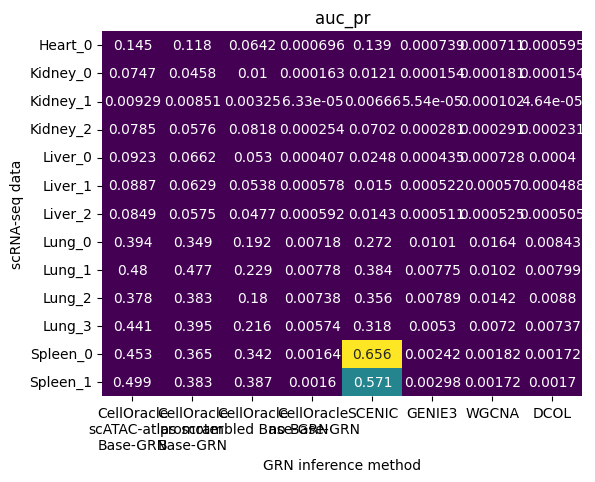

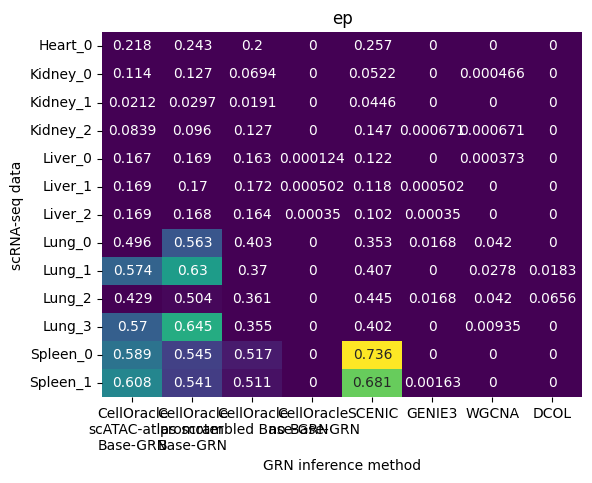

In [1]:
# calculate benchmarking scores using Kenji's imeplementation
%run ../GRN/post_GRN/calculate_scores_CO.py --benchmark-method CO --verbose 
# plot them as a heatmap 
%run ../GRN/post_GRN/plot_scores.py --verbose --benchmark-method CO

Different samples: 100%|██████████| 13/13 [07:37<00:00, 35.21s/it]


output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/grn_score_summary_22.parquet


Run for metrics: 100%|██████████| 4/4 [00:00<00:00, 389.62it/s]


output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/scores_all_auc.csv
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/scores_all_epr.csv
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/scores_all_auc_pr.csv
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/scores_all_ep.csv
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/figures/auc.png
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/figures/epr.png
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/figures/auc_pr.png
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/scores_M1/figures/ep.png


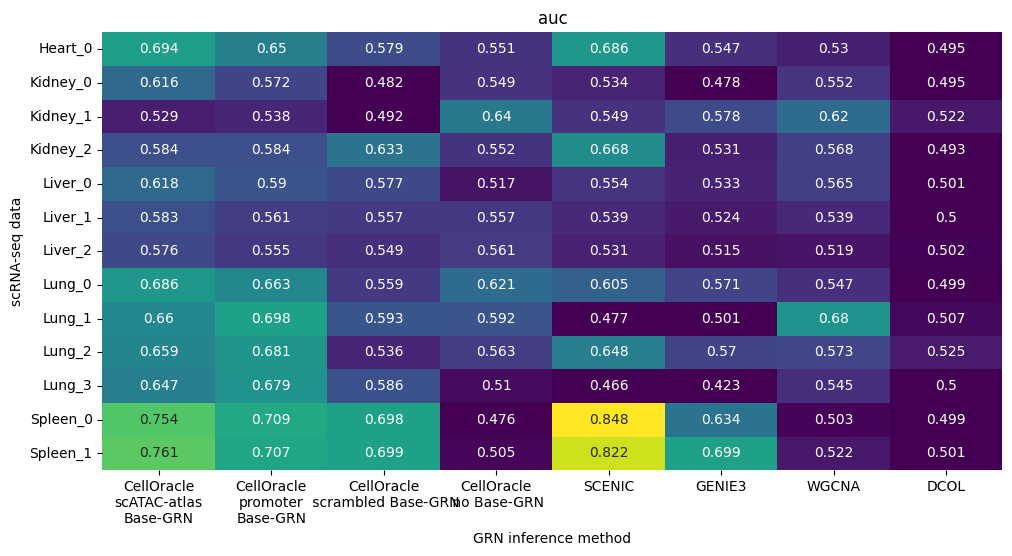

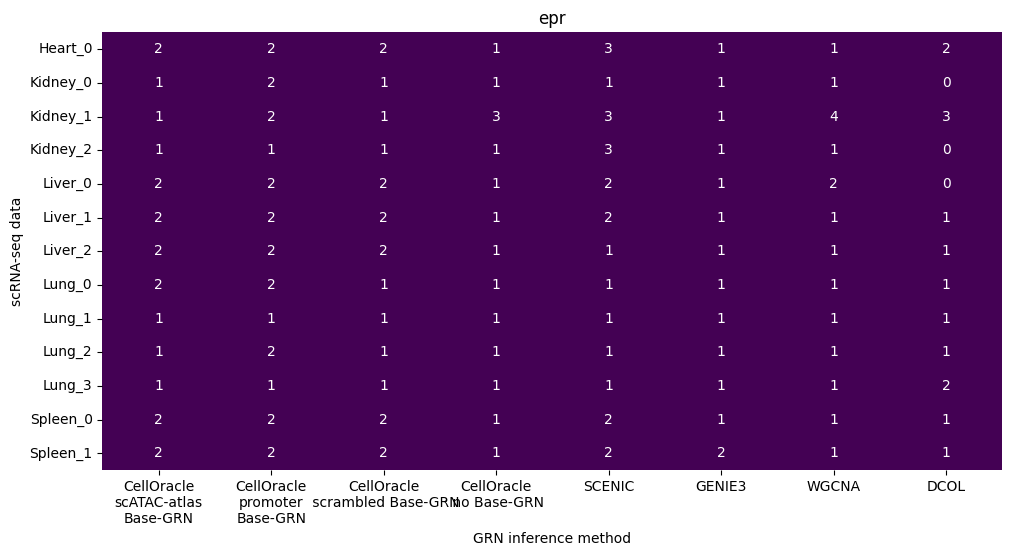

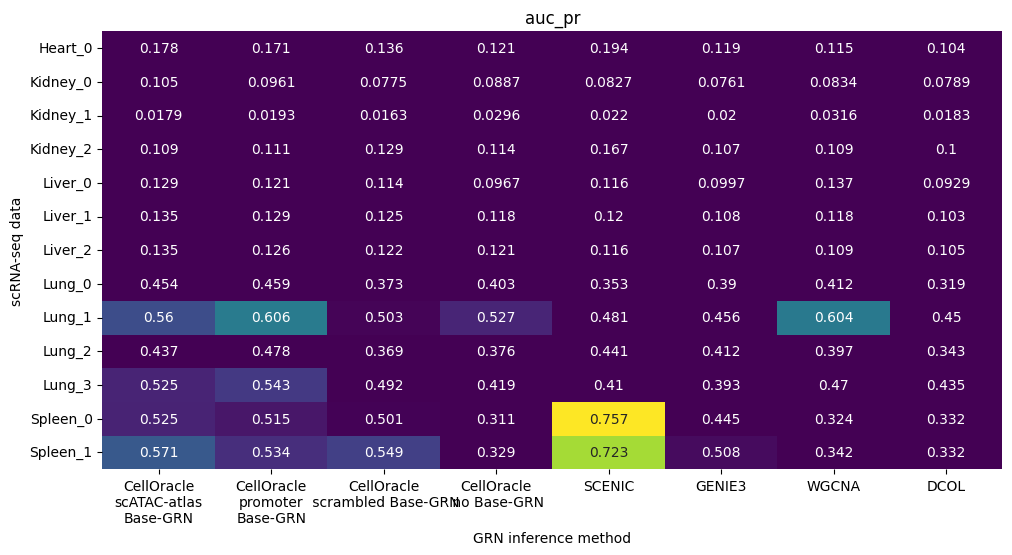

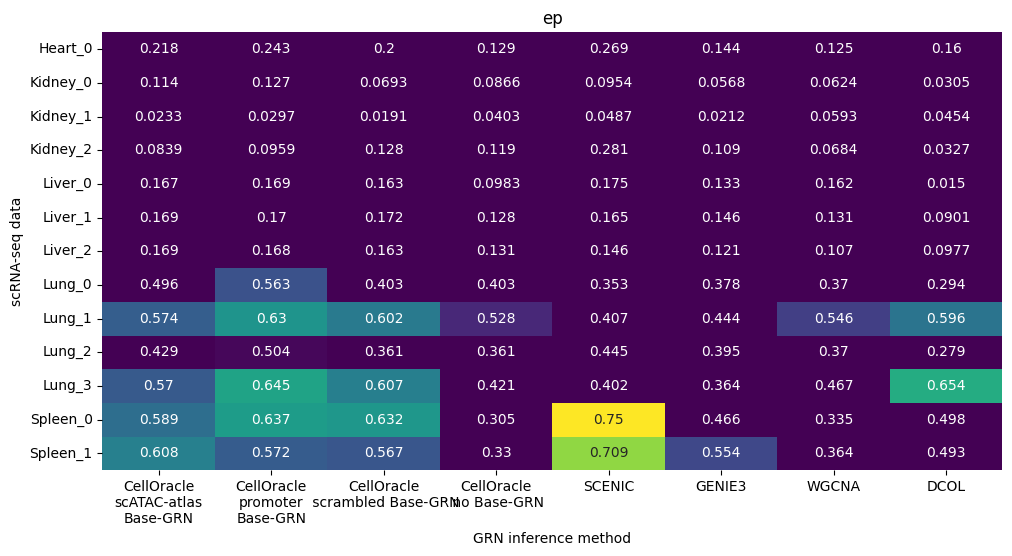

In [3]:
# calculate benchmarking scores using M1 formulation
%run ../GRN/post_GRN/calculate_scores_CO.py --benchmark-method M1 --verbose 
# plot the scores based on the M1 implementaion
%run ../GRN/post_GRN/plot_scores.py --verbose --benchmark-method M1

In [4]:
# calculate the stats
%run ../GRN/post_GRN/benchmarking_stats.py --benchmark-method CO --verbose --force
# %run ../GRN/post_GRN/benchmarking_stats.py --benchmark-method M1 --verbose --force

Different samples:   0%|          | 0/13 [00:00<?, ?it/s]

{'n_TFs_GT': 12, 'n_genes_used': 1309, 'n_links': 33547, 'n_GT': 3482, 'ratio_GT': 0.000599138738064033, 'ratio_links': 0.0019178680646570554}


Different samples:   8%|▊         | 1/13 [00:02<00:26,  2.22s/it]

{'n_TFs_GT': 11, 'n_genes_used': 3857, 'n_links': 235616, 'n_GT': 12750, 'ratio_GT': 0.000152337785447094, 'ratio_links': 0.0008009973264612223}


Different samples:  15%|█▌        | 2/13 [00:26<02:45, 15.08s/it]

{'n_TFs_GT': 11, 'n_genes_used': 3705, 'n_links': 234390, 'n_GT': 12750, 'ratio_GT': 3.63313792039494e-05, 'ratio_links': 0.0009741592101203332}


Different samples:  23%|██▎       | 3/13 [00:50<03:11, 19.18s/it]

{'n_TFs_GT': 11, 'n_genes_used': 3688, 'n_links': 219373, 'n_GT': 12750, 'ratio_GT': 0.0002315775186503858, 'ratio_links': 0.0011268706647720686}


Different samples:  31%|███       | 4/13 [01:14<03:09, 21.01s/it]

{'n_TFs_GT': 29, 'n_genes_used': 4573, 'n_links': 267138, 'n_GT': 33247, 'ratio_GT': 0.00040070946980512277, 'ratio_links': 0.0017647643270808718}


Different samples:  38%|███▊      | 5/13 [01:50<03:31, 26.42s/it]

{'n_TFs_GT': 29, 'n_genes_used': 5034, 'n_links': 315133, 'n_GT': 33247, 'ratio_GT': 0.0004912550275340386, 'ratio_links': 0.002028235491021977}


Different samples:  46%|████▌     | 6/13 [02:33<03:44, 32.11s/it]

{'n_TFs_GT': 29, 'n_genes_used': 5468, 'n_links': 374439, 'n_GT': 33247, 'ratio_GT': 0.0004970973803772576, 'ratio_links': 0.0019499396155371613}


Different samples:  69%|██████▉   | 9/13 [03:29<01:22, 20.69s/it]

{'n_TFs_GT': 4, 'n_genes_used': 124, 'n_links': 311, 'n_GT': 340, 'ratio_GT': 0.008062330623306233, 'ratio_links': 0.016666666666666666}
{'n_TFs_GT': 4, 'n_genes_used': 122, 'n_links': 239, 'n_GT': 340, 'ratio_GT': 0.007500520869504827, 'ratio_links': 0.01097298423501632}
{'n_TFs_GT': 4, 'n_genes_used': 126, 'n_links': 341, 'n_GT': 340, 'ratio_GT': 0.007867768595041322, 'ratio_links': 0.015735537190082645}


Different samples:  85%|████████▍ | 11/13 [03:29<00:24, 12.28s/it]

{'n_TFs_GT': 4, 'n_genes_used': 123, 'n_links': 230, 'n_GT': 340, 'ratio_GT': 0.007370161179225789, 'ratio_links': 0.010469761675161868}


Different samples:  92%|█████████▏| 12/13 [03:30<00:09,  9.62s/it]

{'n_TFs_GT': 4, 'n_genes_used': 612, 'n_links': 7745, 'n_GT': 1665, 'ratio_GT': 0.0017214623101515396, 'ratio_links': 0.002323550113209467}


Different samples: 100%|██████████| 13/13 [03:30<00:00, 16.22s/it]

{'n_TFs_GT': 4, 'n_genes_used': 619, 'n_links': 7687, 'n_GT': 1665, 'ratio_GT': 0.0016982007356108552, 'ratio_links': 0.0022974032715906206}
output -> C:/Users/nourisa/Documents/testProjs/ongoing/inprogress/results/CO/benchmark/stats/stats_CO.csv


          n_TFs_GT  n_genes_used   n_links     n_GT  ratio_GT  ratio_links
Heart_0       12.0        1309.0   33547.0   3482.0  0.000599     0.001918
Kidney_0      11.0        3857.0  235616.0  12750.0  0.000152     0.000801
Kidney_1      11.0        3705.0  234390.0  12750.0  0.000036     0.000974
Kidney_2      11.0        3688.0  219373.0  12750.0  0.000232     0.001127
Liver_0       29.0        4573.0  267138.0  33247.0  0.000401     0.001765
Liver_1       29.0        5034.0  315133.0  33247.0  0.000491     0.002028
Liver_2       29.0        5468.0  374439.0  33247.0  0.000497     0.001950
Lung_0         4.0         124.0     311.0    340.0  0.008062     0.016667
Lung_1         4.0         122.0     239.0    340.0  0.007501     0.010973
Lung_2         4.0         126.0     341.0    340.0  0.007868     0.015736
Lung_3         4.0         123.0     230.0    340.0  0.007370     0.010470
Spleen_0       4.0         612.0    7745.0   1665.0  0.001721     0.002324
Spleen_1       4.0       

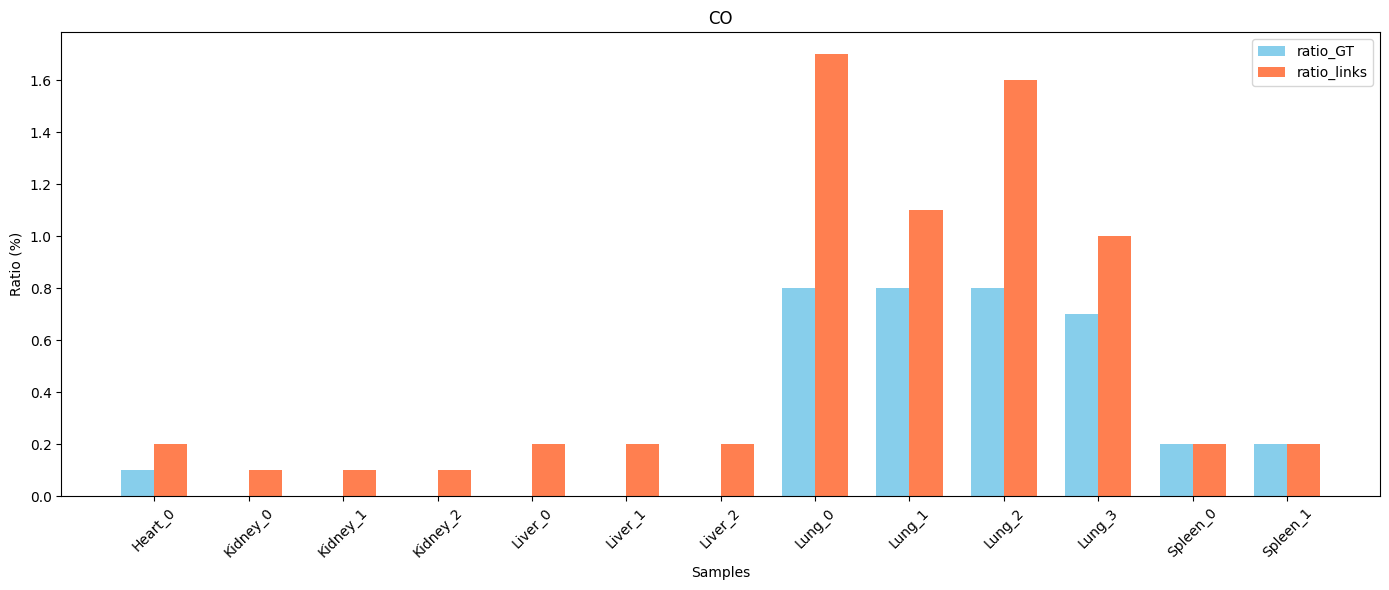

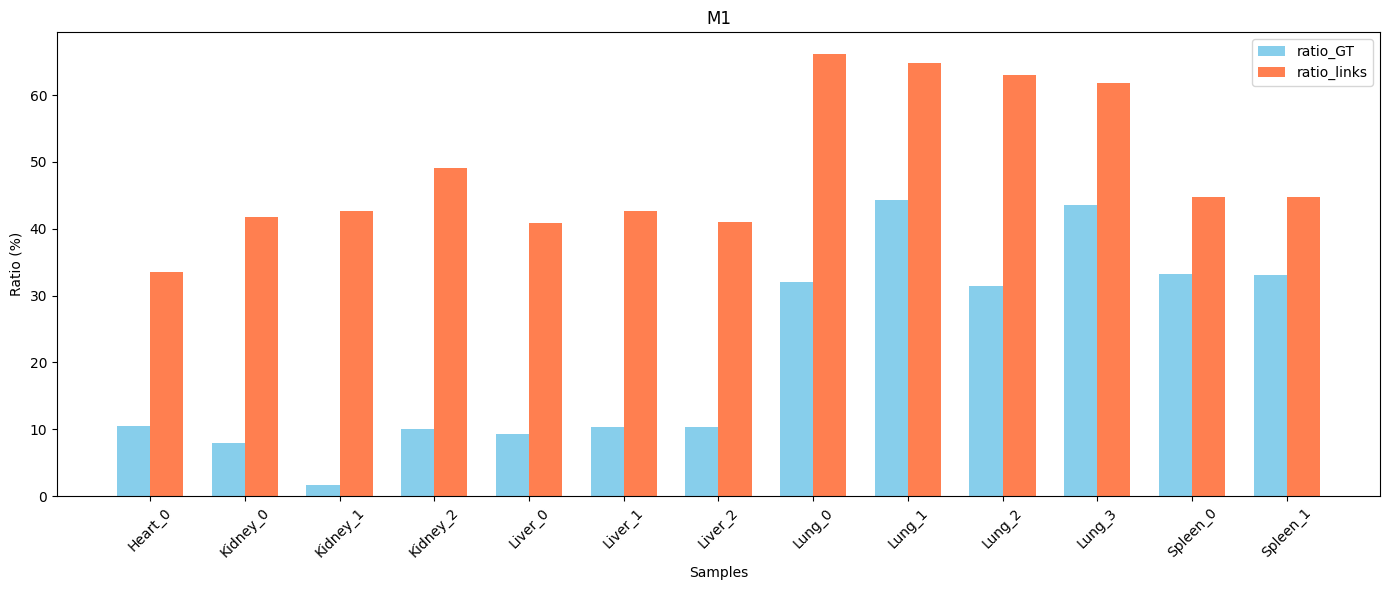

In [1]:
# plot the stats
%run ../GRN/post_GRN/plot_benchmarking_stats.py --benchmark-method CO --verbose
%run ../GRN/post_GRN/plot_benchmarking_stats.py --benchmark-method M1 --verbose